# WS03: Triangular systems and Gaussian elimination

These exercises are indented to give you practice at using the material on numerical approximation and are intended to reinforce the material that was covered in lectures.

Please attempt the worksheet before your tutorial. Support is available in your tutorial or in the Class Team.

*These are partial solutions. Please create [Issues](https://gitlab.com/comp2421-numerical-computation/book/-/issues) and [Merge requests](https://gitlab.com/comp2421-numerical-computation/book/-/merge_requests) with your solutions.*

## Part a (pen and paper warm up)

### 1. Triangular systems

Solve the upper triangular linear system given by

$$
\begin{aligned}
2 x_1 &+& x_2 &+& 4 x_3 &=& 12 \\
&& 1.5 x_2 && &=& 3 \\
&& && 2 x_3 &=& 4
\end{aligned}.
$$

### 2. Elementary row operations

Consider the system

$$
\begin{aligned}
x_1 + 2 x_2 & = 1 && (3) \\
4 x_1 + x_2 & = -3 && (4).
\end{aligned}
$$

Find:

-   $2 \times (3)$ $\rightarrow$
-   $0.25 \times (4)$ $\rightarrow$
-   $(4) + (-1) \times (3)$ $\rightarrow$
-   $(4) + (-4) \times (3)$ $\rightarrow$

### 3. Gaussian elimination

Use Gaussian elimination followed by backward subsitution to solve the linear system of equations given by

-

   $$
   \begin{pmatrix}
   4 & -1 & -1 \\ 2 & 4 & 2 \\ 1 & 2 & 4
   \end{pmatrix}
   \begin{pmatrix}
   x_1 \\ x_2 \\ x_3
   \end{pmatrix} =
   \begin{pmatrix}
   9 \\ -6 \\ 3
   \end{pmatrix}.
   $$

-

   $$
   \begin{pmatrix}
   4 & 3 & 2 & 1 \\ 1 & 2 & 2 & 2 \\
   1 & 1 & 3 & 0 \\ 2 & 1 & 2 & 3
   \end{pmatrix}
   \begin{pmatrix}
   x_1 \\ x_2 \\ x_3 \\ x_4
   \end{pmatrix} =
   \begin{pmatrix}
    10 \\ 7 \\ 5 \\ 8
   \end{pmatrix}.
   $$

   The solution is $\vec{x} = (1, 1, 1, 1)^T$.

## Part b (code implementations and testing)

In [1]:
import numpy as np

### 4. Implementations

Implement the following functions with doc-strings given.

In [2]:
def lower_triangular_solve(A, b):
    """
    Solve the system  A x = b  where A is assumed to be lower triangular,
    i.e. A(i,j) = 0 for j > i, and the diagonal is assumed to be nonzero,
    i.e. A(i,i) != 0.
    
    The code checks that A is lower triangular and converts A and b to
    double precision before computing.

    ARGUMENTS:  A   lower triangular n x n array
                b   right hand side column n-vector

    RETURNS:    x   column n-vector solution
    """

    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # information is available about matrices
    print('"type" of A and b:', A.dtype, b.dtype)
    
    # checks whether A is lower triangular
    n=len(b) # or   n, n = A.shape
        
    for i in range(n):
        for j in range(i+1,n):
            if np.abs(A[i,j]>1.e-12):
                print('A is not lower triangular!')
                return
            else:
                A[j,i] = A[j,i]/A[j,j]

    # checks whether A has zero diagonal element
    for i in range(n):
        if abs(A[i,i]<1.e-12):
            print('A(%d, %d)is zero' %(i,i))
            return
        else:
            b[i] = b[i]/A[i,i]
            A[i,i]=1.
          
    
    #create a new array to store the results
    x = np.zeros([n,1])  # or    x=b
    
    x[0] = b[0]
    for i in range(1,n):
        x[i] = b[i]
        for j in range(i):
            x[i] = x[i] - A[i,j]*x[j]
        
    return x

In [3]:
def upper_triangular_solve(A, b):
    """
    Solve the system  A x = b  where A is assumed to be lower triangular,
    i.e. A(i,j) = 0 for j > i, and the diagonal is assumed to be nonzero,
    i.e. A(i,i) != 0.
    
    The code checks that A is lower triangular and converts A and b to
    double precision before computing.

    ARGUMENTS:  A   lower triangular n x n array
                b   right hand side column n-vector

    RETURNS:    x   column n-vector solution
    """

    # we should take care to ensure that arrays are stored with the correct type - float!
    A = A.astype(np.float64)
    b = b.astype(np.float64)
    
    # information is available about matrices
    print('"type" of A and b:', A.dtype, b.dtype)
    
    # checks whether A is lower triangular
    n=len(b) # or   n, n = A.shape
        
    for i in range(n):
        for j in range(0,i):
            if np.abs(A[i,j]>1.e-12):
                print('A is not upper triangular!')
                return
            else:
                A[j,i] = A[j,i]/A[j,j]

    # checks whether A has zero diagonal element
    for i in range(n):
        if abs(A[i,i]<1.e-12):
            print('A(%d, %d)is zero' %(i,i))
            return
        else:
            b[i] = b[i]/A[i,i]
            A[i,i]=1.
          
    
    #create a new array to store the results
    x = np.zeros([n,1])  # or    x=b
    
    x[n-1] = b[n-1]
    for i in range(2,n+1):
        x[n-i] = b[n-i]
        for j in range(n-i+1, n):
            x[n-i] = x[n-i] - A[n-i,j]*x[j]
        
    return x

In [13]:
# pivoting considered as well
def gaussian_elimination(A, b):
    # To ensure that arrays are stored in double precision.
    A = A.astype(np.float64)
    b = b.astype(np.float64)
     
    # size of solution vector / the square matrix A
    n=len(b) # or   n, n = A.shape
        
  
    for i in range(n):          
         # find the index of the maximal vlaue in array A[i:n,i]
        maximum = abs(A[i,i])
        max_index = i
        for j in range(i+1,n):
            if abs(A[j,i]) > maximum :
                maximum = abs(A[j,i])               
                max_index = j   
                                       
        
        # swap two max_indexs: i and max_index[i]
        temp = b[i]
        b[i] = b[max_index]
        b[max_index] = temp
        for j in range(n):
            temp = A[i,j]
            A[i,j] = A[max_index,j]
            A[max_index,j] = temp  
            
        
        if np.abs(A[i,i])<1.e-15:
            print('A is singular!')
            return    


        # Gaussian elimination
        b[i] = b[i]/A[i,i]
        A[i,:] = A[i,:]/A[i,i]
        for j in range(i+1,n):
            temp=A[j,i] 
            b[j] = b[j]-b[i]*temp
            for k in range(i,n):
                A[j,k] = A[j,k]-A[i,k]*temp           

    
    #create a new array to store the results
    x = np.zeros(n)  # or    x=b
    
    x[n-1] = b[n-1]
    for i in range(2,n+1):
        x[n-i] = b[n-i]
        for j in range(n-i+1, n):
            x[n-i] = x[n-i] - A[n-i,j]*x[j]
        
    return x

### 5. Testing

Test your solutions using your answers to part a. The first test has been implemented for you.

In [14]:
U = np.array([[2, 1, 4], [0, 1.5, 0], [0, 0, 2]])
b = np.array([[12], [3], [4]])

# numpy linear solvers
x0 = np.linalg.solve(U,b)
print(x0)

x = upper_triangular_solve(U, b)
print(x)

np.testing.assert_almost_equal(x, x0)

[[1.]
 [2.]
 [2.]]
"type" of A and b: float64 float64
[[1.]
 [2.]
 [2.]]


In [15]:
A = np.array([[-10, 2, 0, 67], [-2, 5, -77, 1.e-5], [60, 7, 0, 8], [-100, -7, 0.001, 8]])
b = np.array([1, 2, 9, 0])

# numpy linear solvers
x0 = np.linalg.solve(A,b)
#x0 = np.linalg.inv(A).dot(b)
print("x0=", x0)

x = gaussian_elimination(A, b)
print("x=",x)

print(np.matmul(A,x)-b)

x0= [-0.2820222   3.86598456  0.23238917 -0.14257002]
x= [-0.2820222   3.86598456  0.23238917 -0.14257002]
[ 1.77635684e-15  3.55271368e-15 -3.55271368e-15  7.54951657e-15]


## Part c: Extension

Next we want to know how good the method is. We do this by testing robustness and efficiency in practical settings

### 6. Robustness

Consider the system of linear equations given by:

$$
\begin{aligned}
x_1 + x_2 & = 3 \\
\varepsilon x_1 + x_2 & = 2 + \varepsilon.
\end{aligned}
$$

- First verify that the true solution is $(x_1, x_2)^T = (1, 2)^T$.
- Write the problem in matrix form. What does your funciton give for small values $\varepsilon = 10^{-4}, 10^{-8}, 10^{-12}$?
- Rewrite the matrix form by considering the equations the other way round. What does your function given now?

TODO contribute your answer - see [Issue #2: Worksheet 3 - Q6](https://gitlab.com/comp2421-numerical-computation/book/-/issues/2)

### 7. Efficiency

Consider the family of systems of linear equations given by

$$
A \vec{x} = \vec{b},
$$

where $A$ is a Vandermonde matrix with coefficients $a_{ij} = j^{i-1}$ and $b_i = i$ for varying sizes $n$.

In [11]:
import time

test_set = np.linspace(100, 300, num=10, endpoint=True, dtype="int")

exc_time = np.zeros(len(test_set))

i=0
for n in test_set:
    B = np.random.rand(n, n)
    eps = 0.1
    
    A = eps * np.eye(n) + B * B.T
    x = np.ones(n)
    b = np.matmul(A, x)
    
    start = time.time()
    x = gaussian_elimination(A, b)
    end = time.time()
    
    exc_time [i] = end - start
    i = i+1
    #print(np.matmul(A,x)-b)

print(exc_time)

[0.17820001 0.36240005 0.51699996 0.77600002 1.09520006 1.55619979
 2.07860041 2.85519981 3.53619981 4.41759992]


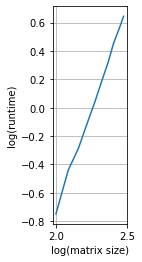

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
# we expect log(exc_time) / log10(test_set) = 3 because the run time of the Gaussian elimination is O(n^3)
plt.plot(np.log10(test_set), np.log10(exc_time))
plt.xlabel("log(matrix size)")
plt.ylabel("log(runtime)")
plt.grid()
ax.set_aspect('equal', 'box')
plt.show()

Test the run time of your Gaussian elimination implementation for a range of values `n` based on the data from `generate_test_set`. 